<a href="https://colab.research.google.com/github/ZENITH503/LEETCODE-PROBLEMS-SOLUTION-LOGIC/blob/main/Face_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install jovian --upgrade -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od

dataset_url='https://www.kaggle.com/datasets/splcher/animefacedataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zenithteacho
Your Kaggle Key: ··········


100%|██████████| 395M/395M [00:05<00:00, 82.0MB/s]


In [4]:
import os
DATA_DIR='./animefacedataset'
print(os.listdir(DATA_DIR))

['images']


In [5]:
import jovian
jovian.utils.colab.set_colab_file_id('1Bz0oJP4zOfTu3Zd2QhFAvY0EXj_119E6')

In [6]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
import torchvision.transforms as T
from torchvision.datasets import ImageFolder


In [7]:
image_size=64
batch_size=128
stats=(0.5,0.5,0.5),(0.5,0.5,0.5)

In [8]:

transform = T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)
])
#The normalization process involves subtracting the mean value from each pixel and dividing by the standard deviation.
#This helps in training models more effectively by ensuring that all the input features (pixels) have a similar scale and distribution.

train_ds = ImageFolder(DATA_DIR, transform=transform)


train_dl=DataLoader(train_ds,
                    batch_size,
                    shuffle=True,
                    num_workers=3,
                    pin_memory=True)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [9]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline


#Image tensors are denormalized to restore the original pixel values of the images
#This scaling helps in training models more effectively by ensuring that all the input features (in this case, pixels) have a similar range and distribution.
#However, after the model has made predictions or processed the images, it is often necessary to interpret or visualize the results in the original pixel value range.
#Therefore, the image tensors need to be denormalized to revert them back to their original pixel values.
#By denormalizing the image tensors, you can view the images as they were originally captured or processed, which can be useful for visual inspection, further analysis, or presenting the results to others.
#Denormalization restores the original scale and range of the pixel values, allowing for a more meaningful interpretation of the images.

In [10]:
def denorm(img_tensors):
  return img_tensors * stats[1][0] + stats[0][0]

#the denorm() function takes normalized image tensors and transforms them back to their original range of pixel values.
#This is done by reversing the scaling and shifting that were applied during the normalization process.

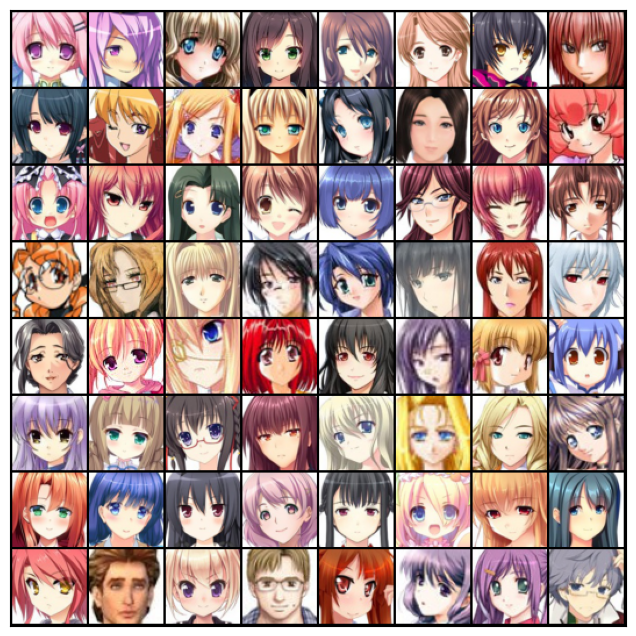

In [15]:
def show_images(images,nmax=64):
  fig, ax=plt.subplots(figsize=(8,8))
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(make_grid(denorm(images.detach()[:nmax]),nrow=8).permute(1,2,0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

show_batch(train_dl)


In [19]:
!pip install jovian --upgrade --quiet

In [16]:
import jovian

In [20]:
jovian.commit(project=project_name , environment=None)

NameError: ignored